# Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

In [1]:
import cv2
import os
import requests
import matplotlib.pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/'
fileName = '100zloty.jpg'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

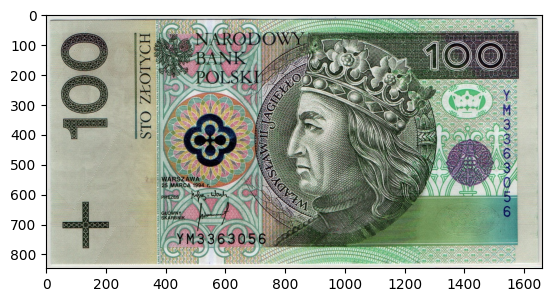

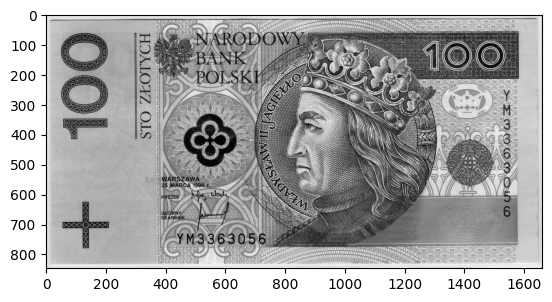

In [2]:
I = cv2.imread(fileName)
plt.imshow(I)
plt.show()

I = cv2.cvtColor(I, cv2.COLOR_RGB2GRAY)
plt.imshow(I)
plt.gray()
plt.show()

In [3]:
lst = []
for i in range(I.shape[0]):
    for j in range(I.shape[1]):
         lst.append(np.binary_repr(I[i][j] ,width=8))

print(lst[0])

11101001


In [4]:
def plane(img, plane_n):
  lst = []
  for i in img:
    if i[plane_n] == "1":
      lst.append(255)
    else:
      lst.append(0)

  return lst

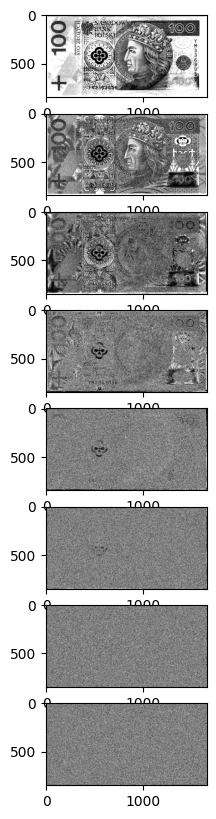

In [5]:
fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(10, 10))

for i in range(0, 8):
  I0 = plane(lst, i)
  I0 = np.reshape(I0, (I.shape[0] ,I.shape[1]))

  axes[i].imshow(I0)

fig.show()

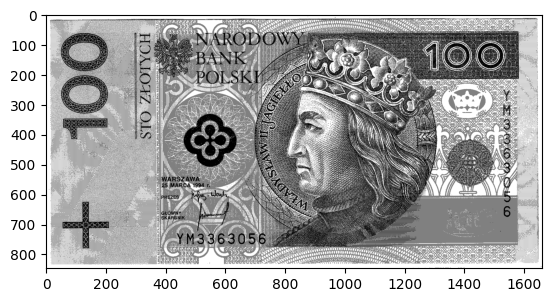

In [6]:
I01 = cv2.add(np.reshape(plane(lst, 0), (I.shape[0] ,I.shape[1])), np.reshape(plane(lst, 1), (I.shape[0] ,I.shape[1])))
cv2.normalize(I01, I01, 0, 255, cv2.NORM_MINMAX)

plt.imshow(I01.astype('uint8'))
plt.show()

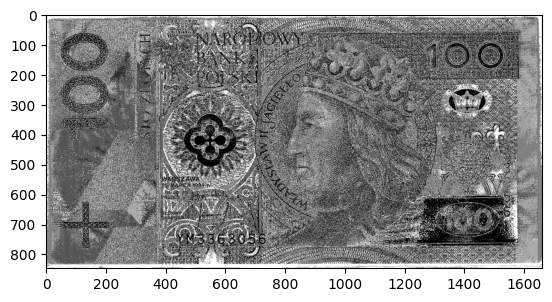

In [7]:
I12 = cv2.add(np.reshape(plane(lst, 1), (I.shape[0] ,I.shape[1])), np.reshape(plane(lst, 2), (I.shape[0] ,I.shape[1])))
cv2.normalize(I12, I12, 0, 255, cv2.NORM_MINMAX)

plt.imshow(I12.astype('uint8'))
plt.show()

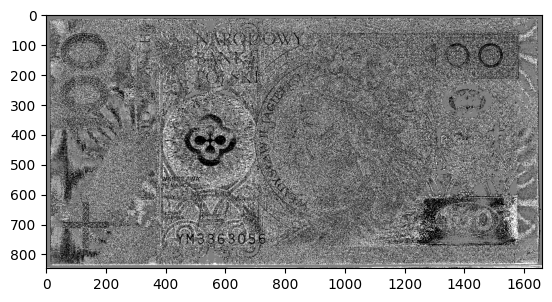

In [8]:
I23 = cv2.add(np.reshape(plane(lst, 2), (I.shape[0] ,I.shape[1])), np.reshape(plane(lst, 3), (I.shape[0] ,I.shape[1])))
cv2.normalize(I23, I23, 0, 255, cv2.NORM_MINMAX)

plt.imshow(I23.astype('uint8'))
plt.show()

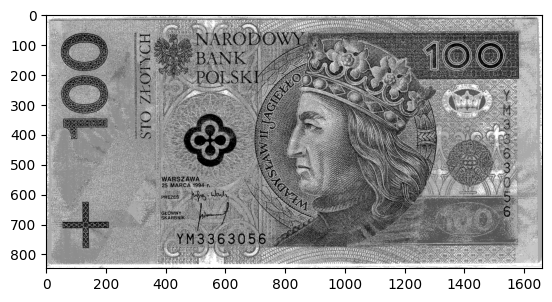

In [9]:
I01 = cv2.add(np.reshape(plane(lst, 0), (I.shape[0] ,I.shape[1])), np.reshape(plane(lst, 1), (I.shape[0] ,I.shape[1])))
I012 = cv2.add(I01, np.reshape(plane(lst, 2), (I.shape[0] ,I.shape[1])))
cv2.normalize(I012, I012, 0, 255, cv2.NORM_MINMAX)

plt.imshow(I012.astype('uint8'))
plt.show()